In [ ]:
from google.colab import drive   # connect colab to google drive for transferring


In [ ]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

In [ ]:
###### Part1 Process the Data
DataTable = pd.read_excel(r'drive/My Drive/Colab Notebooks/peptide_qsar/DPPS_descriptor.xlsx')            # read descriptors from AA_descriptor file in google drive
DataTable = DataTable.values                   # change DataFrame into Array

In [ ]:
def DataChoice(str1):
    '''
    define the function for generating the updated peptide descriptor table
    '''
    AA = DataTable[:,0].tolist()      # get the 0th column in AA_descriptor table, ['A', 'R','N'...]
    id1 = AA.index(str1)              # get the Nth row for each amino acid in AA_descriptor table, e.g., input 'A', output 0; input 'R', output 1
    St = DataTable[id1,1]             # get the three letter name from 1ts column of the AA_descriptor table, e.g. input str1='A', then id1=0, output 'ALA'
    Data = DataTable[id1,2:]          # get the descriptors (start from 2nd column) from the AA_descriptor table e.g. input str='A', then id1=0, ouput the ten descriptors of Ala
    return St, Data

In [ ]:
Data = pd.read_csv(r'drive/My Drive/Colab Notebooks/peptide_qsar/data_peptide.csv')   
Data = Data.values
Num = Data.shape[0]           # total number of peptides

In [ ]:
Str_last = []                 # storage the peptide sequence
Data_last = np.zeros((Num, 10*len(Data[0,0]))) # generate zero matrix for storaging the peptide name and its descritpor in dimensiong 1 X 10*8, each AA has 10 descriptors, and each peptide has 8 AAs

In [ ]:
# Get the peptide descriptor table
for ii in range(Num):
    Str_On = ''         # for storage the name of the peptide, e.g. AlaLeuGln
    Val_On1 = []        # for storage the descriptor of peptide, 1 X 80
    Str1 = Data[ii,0]   # each peptide sequence, e.g. 'HESTGNLI'
    
    N_str1 = len(Data[ii,0])       # length of the peptide
    for jj in range(N_str1):
        S1 = Str1[jj]        # take the single letter from the peptide, e.g. A
        Str_Temp, Val_out = DataChoice(S1) # get it three letter name Ala and descriptors
        Str_On = Str_On + Str_Temp     # combine all three lette name together AlaLeuGln...
        Val_On1.append(Val_out)        # combine all the descriptor 1 X 80
        
    Siz = np.array(Val_On1).shape      # array dimension
    Val_On = np.array(Val_On1).reshape(1,Siz[0]*Siz[1])  
    Str_last.append(Str_On)
    Data_last[ii,:] = Val_On
    
Data_Processed = pd.DataFrame(Data_last, index=Str_last)
Data_Processed.loc[:, 'Y'] = Data[:,1]                   

In [ ]:
# ouput the processed data
writer = pd.ExcelWriter('drive/My Drive/Colab Notebooks/peptide_qsar/data_processed.xlsx')
Data_Processed.to_excel(writer)
writer.save()

In [ ]:
###### Part2 PLS regression
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(Data_last, Data[:,1], test_size=0.2,random_state=5)

# pls model
pls1 = PLSRegression(n_components=10)   # n_components Hyper Parameter!
pls1.fit(X_train, y_train)
# predict
y_train_pred = pls1.predict(X_train)
y_test_pred = pls1.predict(X_test)

In [ ]:
###### Part3 calculate the RMSerrors
# Calculate train metrics
train_metrics = {}
train_metrics['RMSE'] = mean_squared_error(y_train, y_train_pred, squared = False)
train_metrics['R^2'] = r2_score(y_train, y_train_pred)


# Calculate test metrics
test_metrics = {}
test_metrics['RMSE'] = mean_squared_error(y_test, y_test_pred, squared = False)
test_metrics['R^2'] = r2_score(y_test, y_test_pred)


# Print
print('train metrics:', train_metrics, sep='\n')
print('test metrics:', test_metrics, sep='\n')

train metrics:
{'RMSE': 0.27333625178046045, 'R^2': 0.8909915553250659}
test metrics:
{'RMSE': 0.6646140891514564, 'R^2': 0.3023474782468777}


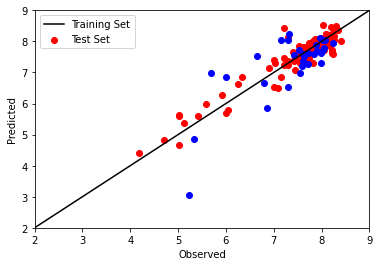

In [ ]:
###### Part4 visualization
plt.figure()
plt.scatter(y_train, y_train_pred,c='r',marker='o')
plt.scatter(y_test, y_test_pred,c='b',marker='o')
plt.plot([2,9], [2,9],c='k')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.xlim([2,9])
plt.ylim([2,9])
plt.legend(['Training Set', 'Test Set'])
plt.savefig('drive/My Drive/Colab Notebooks/peptide_qsar/results.jpg', dpi=600)
plt.show()